In [1]:
import numpy as np
np.set_printoptions(precision=3) # only 3 decimals in print
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
from scipy.integrate import solve_ivp, quad
from scipy.optimize import fsolve
from scipy.spatial.distance import pdist, squareform

plt.rc("axes", labelsize = 11)
plt.rc("xtick", labelsize = 10, top = True, direction="in")
plt.rc("ytick", labelsize = 10, right = True, direction="in")
plt.rc("axes", titlesize = 13)
plt.rc("legend", fontsize = 10, loc = "best")
plt.rc('animation', html='jshtml')

In [2]:
pos_flat = np.loadtxt('ex18_data.txt')
positions = pos_flat.reshape(-1,pos_flat.shape[1]//2,2)

In [3]:
class PCA: # Principal Component Analysis
    def __init__(self, n_components):
        self.k = n_components
    
    def fit(self, X):
        M, p = X.shape
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        C = 1/(M-1) * X_centered.T @ X_centered

        lambdas, Q = np.linalg.eig(C)
        eigenvalue_order = np.argsort(lambdas)[::-1]
        lambdas = lambdas[eigenvalue_order]
        Q = Q[:,eigenvalue_order]
        self.Qk = Q[:,:self.k]
    
    def transform(self, X):
        X_centered = X - self.mean
        return X_centered @ self.Qk

In [4]:
data_original = np.array([[2.5, 2.4],
          [2.0, 1.0],
          [2.2, 2.9],
          [1.4, 2.2],
          [1.1, 0.9]])

pca = PCA(2)
pca.fit(data_original)
data_transformed = pca.transform(data_original)
print(data_transformed)

[[-0.756 -0.367]
 [ 0.722 -0.528]
 [-1.075  0.122]
 [-0.096  0.536]
 [ 1.205  0.238]]


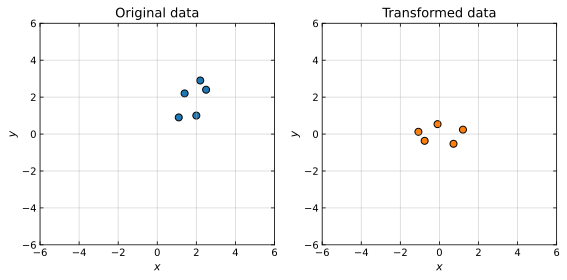

In [5]:
fig, axs = plt.subplots(1,2, figsize=(8,4))
for (i, ax), data in zip(enumerate(axs), [data_original, data_transformed]):
    ax.set(xlabel=r'$x$', ylabel=r'$y$', xlim=[-6,6], ylim=[-6,6], title=['Original data', 'Transformed data'][i])
    ax.grid(alpha=0.5)
    ax.scatter(*data.T, s=50, c=['tab:blue', 'tab:orange'][i], edgecolors='k')
fig.tight_layout()
fig.savefig('ex21_fig1.png')

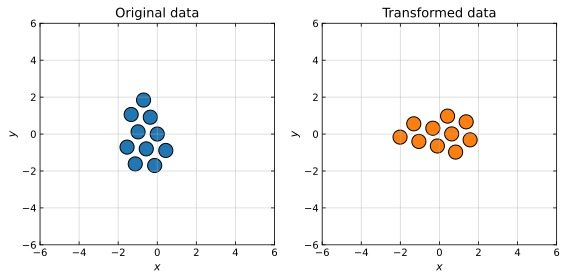

In [6]:
pca = PCA(2)
data = positions[10]
pca.fit(data)
data_transformed = pca.transform(data)

fig, axs = plt.subplots(1,2, figsize=(8,4))
for (i, ax), data in zip(enumerate(axs), [data, data_transformed]):
    ax.set(xlabel=r'$x$', ylabel=r'$y$', xlim=[-6,6], ylim=[-6,6], title=['Original data', 'Transformed data'][i])
    ax.grid(alpha=0.5)
    ax.scatter(*data.T, s=200, c=['tab:blue', 'tab:orange'][i], edgecolors='k')
fig.tight_layout()
fig.savefig('ex21_fig2.png')

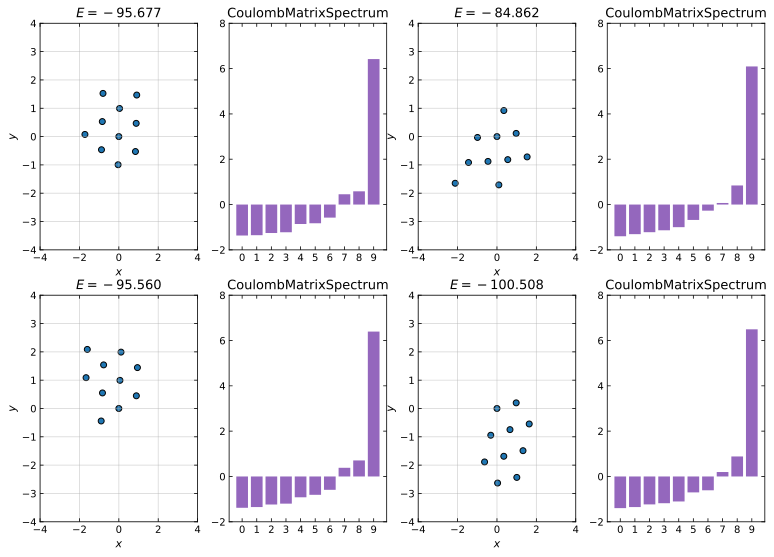

In [7]:
from ex20_more_descriptors import DescriptorCollection, CoulombMatrixSpectrum, ConnectivityGraphSpectrum, CoordinationNumbers, PairDistances
dc = DescriptorCollection()
fig, axs = plt.subplots(2, 4, figsize=(13, 9))
for ax1, ax2 in zip(axs.flatten()[::2], axs.flatten()[1::2]):
    i = np.random.randint(0, len(positions)-1)
    data = positions[i]
    dc.plot_2Dcluster(positions[i], ax1)
    dc.plot_descriptors(positions[i], ax2, idd=False, cnp=False, cgs=False, cms=True)
fig.savefig('ex21_fig3.png')

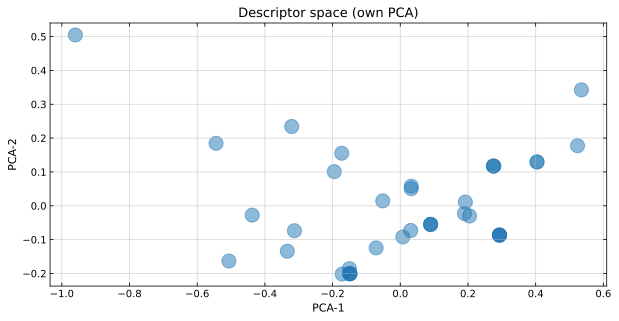

In [8]:
cms = CoulombMatrixSpectrum()
# "data" should be a 10x38 matrix, where each column is cms.descriptor(positions[i]) for i in range(len(positions))
data = np.array([cms.descriptor(pos) for pos in positions])
pca = PCA(2)
pca.fit(data)
data_transformed = pca.transform(data)

fig, ax = plt.subplots(figsize=(10,5))
ax.set(xlabel="PCA-1", ylabel="PCA-2", title="Descriptor space (own PCA)", aspect='equal')
ax.grid(alpha=0.5)
ax.scatter(*data_transformed.T, s=200, alpha=0.5)
fig.savefig('ex21_fig4.png')

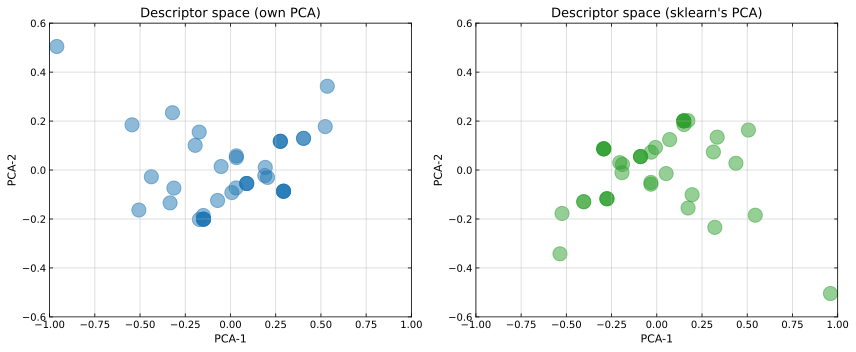

In [9]:
import sklearn.decomposition as skd
# Time to compare with sklearn's PCA
pca_skd = skd.PCA(n_components=2)
pca_skd.fit(data)
data_transformed_skd = pca_skd.transform(data)
all_data = [data_transformed, data_transformed_skd]
colors = ['tab:blue', 'tab:green']
titles = ["Descriptor space (own PCA)", "Descriptor space (sklearn's PCA)"]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
for ax, data, color, title in zip(axs, all_data, colors, titles):
    ax.set(xlabel="PCA-1", ylabel="PCA-2", title=title, xlim=[-1, 1], ylim=[-0.6, 0.6])
    ax.grid(alpha=0.5)
    ax.scatter(*data.T, s=200, alpha=0.5, c=color)
fig.tight_layout()
fig.savefig('ex21_fig5.png')

In [10]:
# Rattled clusters
